In [ ]:
pip install pyeasyga

Define a grade e os parâmetros do algoritmo genético.
Cria uma população inicial de soluções aleatórias.
Avalia a qualidade de cada solução usando uma função de fitness.
Realiza várias iterações do algoritmo genético, aplicando operações de seleção, cruzamento e mutação para gerar novas soluções.
Repete o processo por várias tentativas para explorar diferentes soluções.
Retorna o melhor caminho encontrado e o seu fitness correspondente.
Plota o melhor caminho encontrado na grade.
O algoritmo genético é usado para otimizar a busca pelo melhor caminho na grade, aprendendo com as soluções anteriores e evoluindo para encontrar soluções cada vez melhores ao longo das gerações e tentativas, evitando obstáculos e buscando maximizar uma função de recompensa.

Tentativa 1
Melhor caminho encontrado na tentativa:
[(6, 4), (6, 3), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9)]
Fitness do melhor caminho na tentativa: 1930.0

Tentativa 2
Melhor caminho encontrado na tentativa:
[(6, 4), (6, 3), (6, 4), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9), (10, 9)]
Fitness do melhor caminho na tentativa: 1950.0

Tentativa 3
Melhor caminho encontrado na tentativa:
[(6, 4), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9), (10, 9)]
Fitness do melhor caminho na tentativa: 1990.0

Tentativa 4
Melhor caminho encontrado na tentativa:
[(6, 4), (6, 3), (6, 4), (5, 4), (4, 4), (3, 4), (2, 4), 

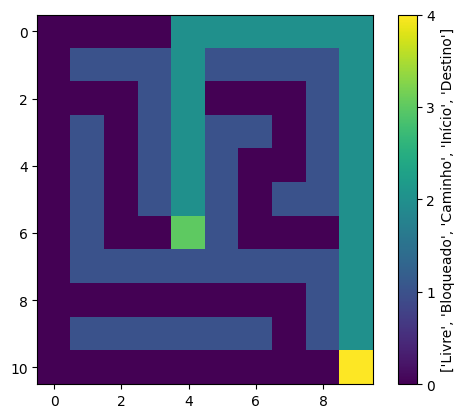

In [55]:
import random
import numpy as np
from pyeasyga import pyeasyga
import matplotlib.pyplot as plt
import time

grade = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

population_size = 100
generations = 200
mutation_probability = 0.1
crossover_probability = 0.8
num_ants = 10
evaporation_rate = 0.5
alpha = 1.0
beta = 1.0
recompensa_destino = 1000
recompensa_obstaculo = -10
recompensa_livre = 1
taxa_exploracao = 0.1
num_tentativas = 10

def fitness(individual, inicial_pos, recompensas):
    total_distancia = 0
    atual_pos = inicial_pos
    destino_pos = (len(grade) - 1, len(grade[0]) - 1)
    caminho = [atual_pos]
    visitados = set()

    for direcao in individual:
        prox = move(atual_pos, direcao)
        if valido(prox, grade):
            if prox not in visitados:
                total_distancia += recompensas[prox]
                atual_pos = prox
                caminho.append(atual_pos)
                visitados.add(atual_pos)
                if atual_pos == destino_pos:
                    total_distancia += recompensa_destino
                    break
            else:
                total_distancia += recompensa_obstaculo
        else:
            total_distancia += recompensa_obstaculo

    if atual_pos != destino_pos:
        total_distancia += manhattan_distance(atual_pos, destino_pos)

    return total_distancia, caminho

def manhattan_distance(pos1, pos2):
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

def move(posicao, direcao):
    linha, coluna = posicao
    if direcao == 0:  # Cima
        return linha - 1, coluna
    elif direcao == 1:  # Direita
        return linha, coluna + 1
    elif direcao == 2:  # Baixo
        return linha + 1, coluna
    elif direcao == 3:  # Esquerda
        return linha, coluna - 1

def valido(posicao, grade):
    linha, coluna = posicao
    linhas, colunas = len(grade), len(grade[0])
    return 0 <= linha < linhas and 0 <= coluna < colunas and grade[linha][coluna] == 0

def create_individual(data=None):
    return [random.randint(0, 3) for _ in range(len(grade) * len(grade[0]))]

def plot_caminho(caminho, inicial_pos):
    grade_plot = np.array(grade)
    for pos in caminho:
        grade_plot[pos] = 2
    grade_plot[inicial_pos] = 3
    grade_plot[len(grade) - 1, len(grade[0]) - 1] = 4
    plt.imshow(grade_plot, cmap='viridis')
    plt.colorbar(ticks=[0, 1, 2, 3, 4], label=['Livre', 'Bloqueado', 'Caminho', 'Início', 'Destino'])
    plt.show()

def fitness_wrapper(individual, data):
    inicial_pos, recompensas = data
    fitness_value, caminho = fitness(individual, inicial_pos, recompensas)
    return fitness_value

def mutate(individual):
    for i in range(len(individual)):
        if random.random() < taxa_exploracao:
            individual[i] = random.randint(0, 3)
    return individual

inicial_pos = (6, 4)
destino_pos = (len(grade) - 1, len(grade[0]) - 1)
melhor_caminho = None
melhor_fitness = float('-inf')

recompensas = np.zeros((len(grade), len(grade[0])))
recompensas[destino_pos[0], destino_pos[1]] = recompensa_destino
recompensas[grade == 1] = recompensa_obstaculo
recompensas[grade == 0] = recompensa_livre

for tentativa in range(num_tentativas):
    print(f"Tentativa {tentativa + 1}")

    seed_data = [create_individual() for _ in range(population_size)]
    ga = pyeasyga.GeneticAlgorithm(seed_data,
                                   population_size=population_size,
                                   generations=generations,
                                   mutation_probability=mutation_probability,
                                   crossover_probability=crossover_probability)
    ga.fitness_function = fitness_wrapper
    ga.seed_data = (inicial_pos, recompensas)

    ga.create_individual = create_individual
    ga.mutate_function = mutate

    ga.run()

    best_individual = ga.best_individual()
    caminho_atual = fitness(best_individual[1], inicial_pos, recompensas)[1]
    fitness_atual = best_individual[0]

    print("Melhor caminho encontrado na tentativa:")
    print(caminho_atual)
    print("Fitness do melhor caminho na tentativa:", fitness_atual)
    print()

    if fitness_atual > melhor_fitness:
        melhor_caminho = caminho_atual
        melhor_fitness = fitness_atual

print("Número total de tentativas:", num_tentativas)
print("Melhor caminho encontrado:")
print(melhor_caminho)
print("Fitness do melhor caminho:", melhor_fitness)

plot_caminho(melhor_caminho, inicial_pos)

# A baixo esta o mesmo programa com a grade diferente para confirmar que busca o melhor trajeto.

Tentativa 1
Melhor caminho encontrado na tentativa:
[(6, 4), (5, 4), (6, 4), (6, 3), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (9, 7), (10, 7), (10, 8), (10, 9)]
Fitness do melhor caminho na tentativa: 1760.0

Tentativa 2
Melhor caminho encontrado na tentativa:
[(6, 4), (5, 4), (6, 4), (6, 3), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (9, 7), (10, 7), (10, 8), (10, 9)]
Fitness do melhor caminho na tentativa: 1760.0

Tentativa 3
Melhor caminho encontrado na tentativa:
[(6, 4), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (9, 7), (10, 7), (10, 8), (10, 9)]
Fitness do melhor caminho na tentativa: 1840.0



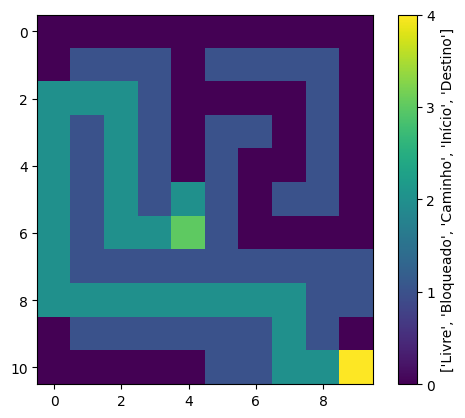

In [58]:
import random
import numpy as np
from pyeasyga import pyeasyga
import matplotlib.pyplot as plt
import time

grade = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
]

population_size = 100
generations = 200
mutation_probability = 0.1
crossover_probability = 0.8
num_ants = 10
evaporation_rate = 0.5
alpha = 1.0
beta = 1.0
recompensa_destino = 1000
recompensa_obstaculo = -10
recompensa_livre = 1
taxa_exploracao = 0.1
num_tentativas = 10

def fitness(individual, inicial_pos, recompensas):
    total_distancia = 0
    atual_pos = inicial_pos
    destino_pos = (len(grade) - 1, len(grade[0]) - 1)
    caminho = [atual_pos]
    visitados = set()

    for direcao in individual:
        prox = move(atual_pos, direcao)
        if valido(prox, grade):
            if prox not in visitados:
                total_distancia += recompensas[prox]
                atual_pos = prox
                caminho.append(atual_pos)
                visitados.add(atual_pos)
                if atual_pos == destino_pos:
                    total_distancia += recompensa_destino
                    break
            else:
                total_distancia += recompensa_obstaculo
        else:
            total_distancia += recompensa_obstaculo

    if atual_pos != destino_pos:
        total_distancia += manhattan_distance(atual_pos, destino_pos)

    return total_distancia, caminho

def manhattan_distance(pos1, pos2):
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

def move(posicao, direcao):
    linha, coluna = posicao
    if direcao == 0:  # Cima
        return linha - 1, coluna
    elif direcao == 1:  # Direita
        return linha, coluna + 1
    elif direcao == 2:  # Baixo
        return linha + 1, coluna
    elif direcao == 3:  # Esquerda
        return linha, coluna - 1

def valido(posicao, grade):
    linha, coluna = posicao
    linhas, colunas = len(grade), len(grade[0])
    return 0 <= linha < linhas and 0 <= coluna < colunas and grade[linha][coluna] == 0

def create_individual(data=None):
    return [random.randint(0, 3) for _ in range(len(grade) * len(grade[0]))]

def plot_caminho(caminho, inicial_pos):
    grade_plot = np.array(grade)
    for pos in caminho:
        grade_plot[pos] = 2
    grade_plot[inicial_pos] = 3
    grade_plot[len(grade) - 1, len(grade[0]) - 1] = 4
    plt.imshow(grade_plot, cmap='viridis')
    plt.colorbar(ticks=[0, 1, 2, 3, 4], label=['Livre', 'Bloqueado', 'Caminho', 'Início', 'Destino'])
    plt.show()

def fitness_wrapper(individual, data):
    inicial_pos, recompensas = data
    fitness_value, caminho = fitness(individual, inicial_pos, recompensas)
    return fitness_value

def mutate(individual):
    for i in range(len(individual)):
        if random.random() < taxa_exploracao:
            individual[i] = random.randint(0, 3)
    return individual

inicial_pos = (6, 4)
destino_pos = (len(grade) - 1, len(grade[0]) - 1)
melhor_caminho = None
melhor_fitness = float('-inf')

recompensas = np.zeros((len(grade), len(grade[0])))
recompensas[destino_pos[0], destino_pos[1]] = recompensa_destino
recompensas[grade == 1] = recompensa_obstaculo
recompensas[grade == 0] = recompensa_livre

for tentativa in range(num_tentativas):
    print(f"Tentativa {tentativa + 1}")

    seed_data = [create_individual() for _ in range(population_size)]
    ga = pyeasyga.GeneticAlgorithm(seed_data,
                                   population_size=population_size,
                                   generations=generations,
                                   mutation_probability=mutation_probability,
                                   crossover_probability=crossover_probability)
    ga.fitness_function = fitness_wrapper
    ga.seed_data = (inicial_pos, recompensas)

    ga.create_individual = create_individual
    ga.mutate_function = mutate

    ga.run()

    best_individual = ga.best_individual()
    caminho_atual = fitness(best_individual[1], inicial_pos, recompensas)[1]
    fitness_atual = best_individual[0]

    print("Melhor caminho encontrado na tentativa:")
    print(caminho_atual)
    print("Fitness do melhor caminho na tentativa:", fitness_atual)
    print()

    if fitness_atual > melhor_fitness:
        melhor_caminho = caminho_atual
        melhor_fitness = fitness_atual

print("Número total de tentativas:", num_tentativas)
print("Melhor caminho encontrado:")
print(melhor_caminho)
print("Fitness do melhor caminho:", melhor_fitness)

plot_caminho(melhor_caminho, inicial_pos)